# install dependencies

In [1]:
!pip3 install inverse-canopy==0.0.21

# **Model Inputs**

In [2]:
from inverse_canopy import InverseCanopy
import tensorflow as tf
import numpy as np

tunable initialized: dtype=<dtype: 'float64'>, epsilon=1e-20
learning_rate: 0.1,patience: 50,min_improvement: 0.001,max_steps: 5000,seed: 372
Step 0: Loss = 7.6837771566635151, performing 43.7 it/sec
Step 100: Loss = 0.8718531648876302, performing 361.6 it/sec
Step 200: Loss = 0.4726493278204202, performing 293.4 it/sec
Step 300: Loss = 0.1720473835447370, performing 324.6 it/sec
Step 400: Loss = 0.0149113791657424, performing 317.0 it/sec
No improvement since Step 373, early stopping.
[Best]  Step 372: Loss = 0.0149190567639887
[Final] Step 422: Loss = 0.0166633899839725

predicted end states
------------------------------------
         5th       Mean      95th
SCRM-1  7.00e-01  7.00e-01  7.00e-01
SCRM-2  5.81e-09  5.90e-09  6.02e-09
SCRM-3  2.03e-09  2.13e-09  2.23e-09
SCRM-4  9.67e-11  1.01e-10  1.06e-10
SCRM-5  3.94e-10  4.13e-10  4.32e-10


predicted conditional events
---------------------------------------------
                  5th       Mean      95th
SCRM             1.00e+

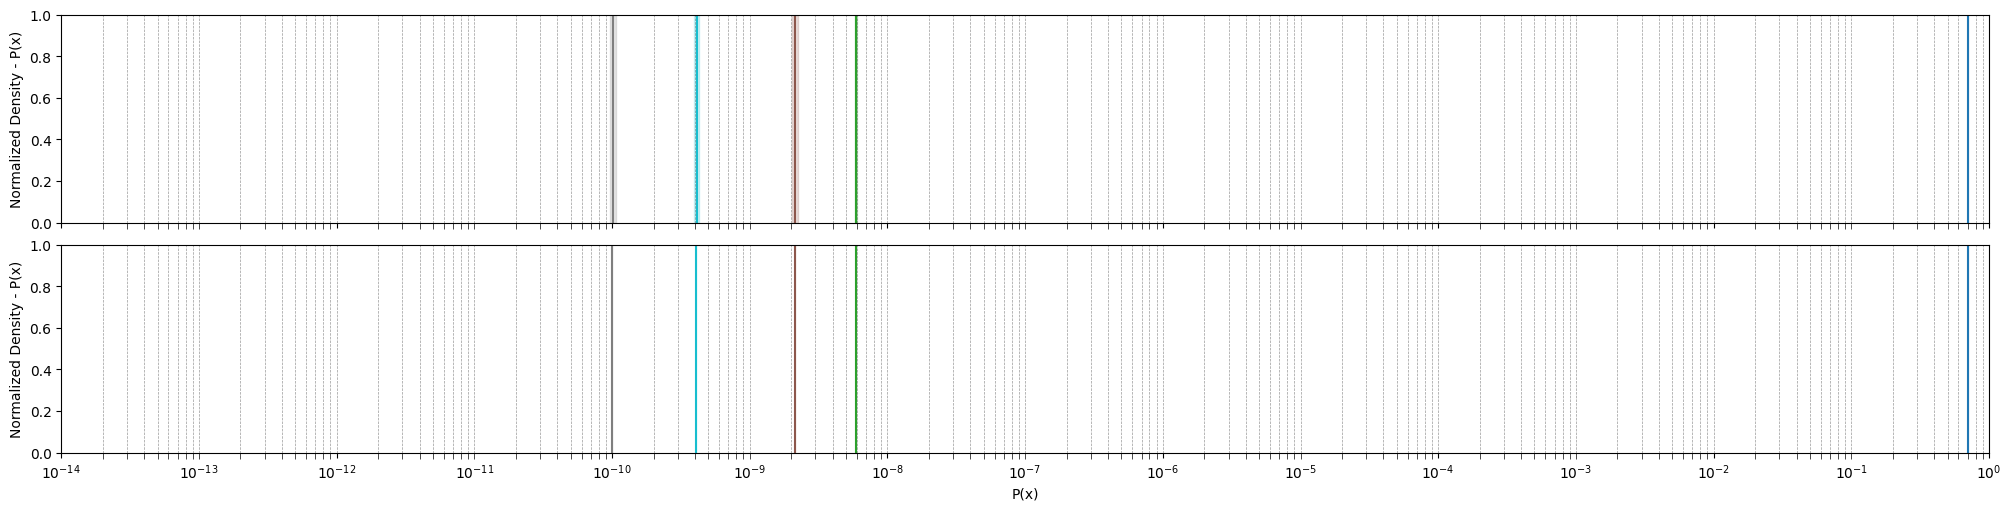

In [3]:
tunable = {
 'num_samples': 100,      # number of monte carlo samples
 'learning_rate': 0.1,    # the gradient update rate
 'dtype': tf.float64,     # use 64-bit floats
 'epsilon': 1e-20,        # useful for avoiding log(0 + epsilon) type errors
 'max_steps': 5000,       # maximum steps, regardless of convergence
 'patience': 50,          # number of steps to wait before early stopping if the loss does not improve
 'initiating_event_frequency': 7e-1,  # set the initiating event (IE) frequency here
 'freeze_initiating_event': True,       # set to False if you'd like to predict the IE frequency as well
}

conditional_events = {
    'names': ['SCRM', 'BPHR', 'DHRS', 'DHRL|~DHRS|BPHR', 'DHRL|~BPHR',],
    'bounds': {
        'mean': {
            'min': 1e-14,
            'max': 1.00,
        },
        'std': {
            'min': 1e-10,
            'max': 1e8,
        },
     },
    'initial': {
       'mean': 5e-1,
       'std': 1e8,
    }
}

end_states = {
    # 'SCRM-0': {
    #     'sequence': [0, np.nan, np.nan, np.nan, np.nan],
    #     'probability': 1.0 - 7e-1 - 5.9e-9 - 2.12e-9 - 1e-10 - 4.1e-10 # one minus all the other end-states
    # },
    'SCRM-1': {
        'sequence': [1, 0, np.nan, np.nan, 0],
        'probability': 7.0e-1,
    },
    'SCRM-2': {
        'sequence': [1, 0, np.nan, np.nan, 1],
        'probability': 5.9e-9,
    },
    'SCRM-3': {
        'sequence': [1,1, 0, 0, np.nan],
        'probability': 2.12e-9,
    },
    'SCRM-4': {
        'sequence': [1,1, 0, 1, np.nan],
        'probability': 1e-10,
    },
    'SCRM-5': {
        'sequence': [1, 1, 1, np.nan, np.nan],
        'probability': 4.10e-10,
    },

}

model = InverseCanopy(conditional_events, end_states, tunable)
model.fit(steps=tunable['max_steps'], patience=tunable['patience'], learning_rate=tunable['learning_rate'])
model.summarize(show_plot=True, show_metrics=False)